# HR Analytics

### 1.Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.



They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

 #### The dataset has the following attributes:

<b>Variable	    Definition</b>

1-  employee_id	           Unique ID for employee

2-  department	           Department of employee

3-  region	               Region of employment (unordered)

4-  education	           Education Level

5-  gender	               Gender of Employee

6-  recruitment_channel	   Channel of recruitment for employee

7-  no_of_trainings	       no of other trainings completed in previous year on soft skills, technical skills etc.

8- age	                   Age of Employee

9-  previous_year_rating   Employee Rating for the previous year

10-  length_of_service	   Length of service in years

11-  KPIs_met >80%	       if Percent of KPIs(Key performance Indicators) >80% then 1 else 0

12-  awards_won?	       if awards won during previous year then 1 else 0

13-  avg_training_score	   Average score in current training evaluations

14-  is_promoted(Target)   Recommended for promotion

### 2.Objective

The objective of this analysis is to identify the employees most likely to get promoted

### 3. Import all Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

### 4. Loading the dataset

In [2]:
train_df=pd.read_csv('E:/Analytics Vidhya Contest/HR Analytics/train_LZdllcl.csv')
test_df=pd.read_csv('E:/Analytics Vidhya Contest/HR Analytics/test_2umaH9m.csv')

In [3]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_df.shape, test_df.shape

((54808, 14), (23490, 13))

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In train dataset <b>education</b> and <b>previous_year_rating</b> columns have missing values

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [8]:
test_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In test dataset also <b>education</b> and <b>previous_year_rating</b> columns have missing values

In [9]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
train_df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

The dataset is highly imbalanced dataset

### 5. Data Exploration

In [11]:
# Defining a function to provide percentages for cross tabs
def pctg(ser):
    return ser/float(ser[-1])

#### Department

In [12]:
department_plot=pd.crosstab(train_df.is_promoted,train_df.department,margins=True)
department_plot

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,All
is_promoted,,,,,,,,,,
0,4840,2330,2282,986,10325,6450,930,15627,6370,50140
1,512,206,136,53,1023,688,69,1213,768,4668
All,5352,2536,2418,1039,11348,7138,999,16840,7138,54808


In [13]:
pd.crosstab(train_df.is_promoted,train_df.department,margins=True).apply(pctg)

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,All
is_promoted,,,,,,,,,,
0,0.904335,0.91877,0.943755,0.948989,0.909852,0.903614,0.930931,0.927969,0.892407,0.91483
1,0.095665,0.08123,0.056245,0.051011,0.090148,0.096386,0.069069,0.072031,0.107593,0.08517
All,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


We can observe that <b>Technology</b> domain has highest promotion % followed by <b>Procurement</b> and <b>Analytics</b>. Least being <b>Legal</b> and <b>HR</b>.
We will definitely consider the feature for modelling as we can see variance.

#### Region

In [14]:
region_plot=pd.crosstab(train_df.region,train_df.is_promoted,margins=True)
region_plot

is_promoted,0,1,All
region,,,
region_1,552,58,610
region_10,597,51,648
region_11,1241,74,1315
region_12,467,33,500
region_13,2418,230,2648
region_14,765,62,827
region_15,2586,222,2808
region_16,1363,102,1465
region_17,687,109,796


In [15]:
pd.crosstab(train_df.region,train_df.is_promoted,margins=True).apply(pctg,axis=1)

is_promoted,0,1,All
region,,,
region_1,0.904918,0.095082,1.0
region_10,0.921296,0.078704,1.0
region_11,0.943726,0.056274,1.0
region_12,0.934000,0.066000,1.0
region_13,0.913142,0.086858,1.0
region_14,0.925030,0.074970,1.0
region_15,0.920940,0.079060,1.0
region_16,0.930375,0.069625,1.0
region_17,0.863065,0.136935,1.0


Region column can t be used directly for modelling. We can do some feature engineering to classify into few categories.

#### Education

In [16]:
education_plot=pd.crosstab(train_df.is_promoted,train_df.education)
education_plot


education,Bachelor's,Below Secondary,Master's & above
is_promoted,,,
0,33661,738,13454
1,3008,67,1471


In [17]:
pd.crosstab(train_df.is_promoted,train_df.education,margins=True).apply(pctg,axis=0)

education,Bachelor's,Below Secondary,Master's & above,All
is_promoted,,,,
0,0.917969,0.91677,0.901441,0.913243
1,0.082031,0.08323,0.098559,0.086757
All,1.000000,1.00000,1.000000,1.000000


Employees holding Master and above degree has highest promotion % but not significantly high compared to rest two category. We will experiment the model with and without this column.

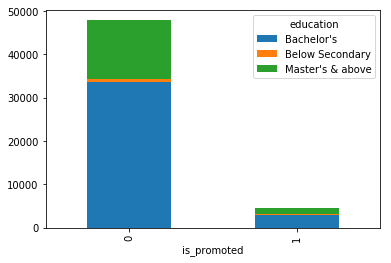

In [18]:
education_plot.plot(kind='bar',stacked=True)

#### Gender

In [19]:
gender_plot=pd.crosstab(train_df.is_promoted,train_df.gender)
gender_plot


gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


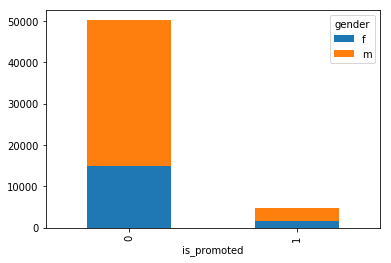

In [20]:
gender_plot.plot(kind='bar',stacked=True)

In [21]:
pd.crosstab(train_df.is_promoted,train_df.gender,margins=True).apply(pctg)

gender,f,m,All
is_promoted,,,
0,0.910066,0.916849,0.91483
1,0.089934,0.083151,0.08517
All,1.000000,1.000000,1.00000


There is equal proportion of employee promoted based on gender. Again We will experiment the model with and without this column as there is not much variance observed.

#### Recruitment Channel

In [22]:
recruitment_plot=pd.crosstab(train_df.is_promoted,train_df.recruitment_channel)
recruitment_plot


recruitment_channel,other,referred,sourcing
is_promoted,,,
0,27890,1004,21246
1,2556,138,1974


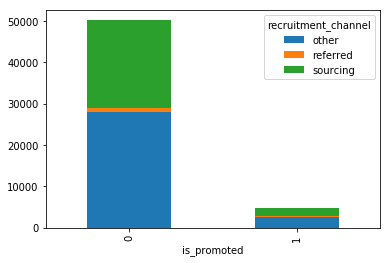

In [23]:
recruitment_plot.plot(kind='bar',stacked=True)

In [24]:
pd.crosstab(train_df.is_promoted,train_df.recruitment_channel,margins=True).apply(pctg)

recruitment_channel,other,referred,sourcing,All
is_promoted,,,,
0,0.916048,0.879159,0.914987,0.91483
1,0.083952,0.120841,0.085013,0.08517
All,1.000000,1.000000,1.000000,1.00000


Though there are less employees being referred as expected. But the % of referred employee promoted is significantly high compared to other channels.
We will keep the feature for modelling.

#### No Of Trainings

In [25]:
pd.crosstab(train_df.is_promoted,train_df.no_of_trainings,margins=True)

no_of_trainings,1,2,3,4,5,6,7,8,9,10,All
is_promoted,,,,,,,,,,,
0,40468,7382,1654,442,125,42,12,5,5,5,50140
1,3910,605,122,26,3,2,0,0,0,0,4668
All,44378,7987,1776,468,128,44,12,5,5,5,54808


In [26]:
pd.crosstab(train_df.is_promoted,train_df.no_of_trainings,margins=True).apply(pctg)

no_of_trainings,1,2,3,4,5,6,7,8,9,10,All
is_promoted,,,,,,,,,,,
0,0.911893,0.924252,0.931306,0.944444,0.976562,0.954545,1.0,1.0,1.0,1.0,0.91483
1,0.088107,0.075748,0.068694,0.055556,0.023438,0.045455,0.0,0.0,0.0,0.0,0.08517
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.00000


In [27]:
test_df.no_of_trainings.value_counts()

1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
9        2
8        2
Name: no_of_trainings, dtype: int64

We can almost see a gradual decrease in employees going more training as well as similar pattern for % of employees promoted based on this column.

In [28]:
train_df.loc[train_df['no_of_trainings'] > 7, 'no_of_trainings']=7

In [29]:
train_df.no_of_trainings.value_counts()

1    44378
2     7987
3     1776
4      468
5      128
6       44
7       27
Name: no_of_trainings, dtype: int64

In [30]:
test_df.loc[test_df['no_of_trainings'] > 7, 'no_of_trainings']=7

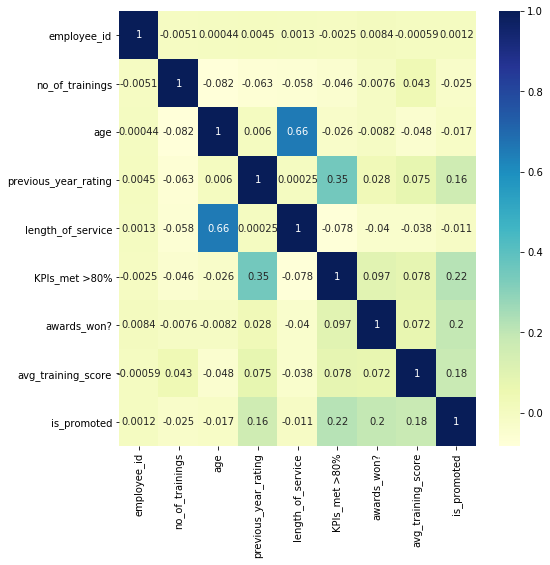

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(train_df.corr(),cmap='YlGnBu',annot=True,ax=ax)

From the above heatmap following observations are made
1. age and length_of_service are highly correlated. We will only use length_of_service
2. previous_year_rating and KPIs_met >80% are correlated.

#### Previous Year Rating

In [32]:
pd.crosstab(train_df.is_promoted,train_df.previous_year_rating,margins=True)

previous_year_rating,1.0,2.0,3.0,4.0,5.0,All
is_promoted,,,,,,
0,6135,4044,17263,9093,9820,46355
1,88,181,1355,784,1921,4329
All,6223,4225,18618,9877,11741,50684


In [33]:
pd.crosstab(train_df.is_promoted,train_df.previous_year_rating,margins=True).apply(pctg)

previous_year_rating,1.0,2.0,3.0,4.0,5.0,All
is_promoted,,,,,,
0,0.985859,0.95716,0.927221,0.920624,0.836385,0.914588
1,0.014141,0.04284,0.072779,0.079376,0.163615,0.085412
All,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


We see a gradual increase in promotion with rating as expected. We will keep this feature

#### Length Of Service

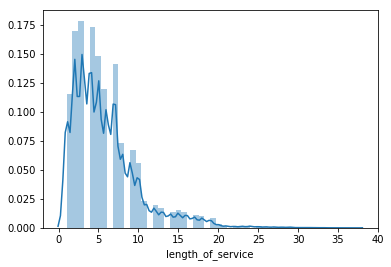

In [34]:
sns.distplot(train_df.length_of_service)

In [35]:
length_of_service=pd.cut(train_df.length_of_service,bins=[0,5,10,15,20,30,40],labels=['0-5','5-10','10-15','15-20','20-30','30-40'])
length_of_service.to_frame()
train_df['length_of_service_binned']=length_of_service

In [36]:
train_df.length_of_service_binned.value_counts()

0-5      30932
5-10     17990
10-15     3539
15-20     1829
20-30      474
30-40       44
Name: length_of_service_binned, dtype: int64

In [37]:
pd.crosstab(train_df.is_promoted,train_df.length_of_service_binned,margins=True)

length_of_service_binned,0-5,5-10,10-15,15-20,20-30,30-40,All
is_promoted,,,,,,,
0,16423,28278,1695,3254,449,41,50140
1,1567,2654,134,285,25,3,4668
All,17990,30932,1829,3539,474,44,54808


In [38]:
pd.crosstab(train_df.is_promoted,train_df.length_of_service_binned,margins=True).apply(pctg)

length_of_service_binned,0-5,5-10,10-15,15-20,20-30,30-40,All
is_promoted,,,,,,,
0,0.912896,0.914199,0.926736,0.919469,0.947257,0.931818,0.91483
1,0.087104,0.085801,0.073264,0.080531,0.052743,0.068182,0.08517
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


We will keep this feature as there is some variance.

In [39]:
length_of_service_test=pd.cut(test_df.length_of_service,bins=[0,5,10,15,20,30,40],labels=['0-5','5-10','10-15','15-20','20-30','30-40'])
length_of_service_test.to_frame()
test_df['length_of_service_binned']=length_of_service_test

In [40]:
test_df.length_of_service_binned.value_counts()

0-5      13398
5-10      7656
10-15     1452
15-20      786
20-30      187
30-40       11
Name: length_of_service_binned, dtype: int64

#### KPIs_met >80%

In [41]:
pd.crosstab(train_df.is_promoted,train_df['KPIs_met >80%'],margins=True)

KPIs_met >80%,0,1,All
is_promoted,,,
0,34111,16029,50140
1,1406,3262,4668
All,35517,19291,54808


In [42]:
pd.crosstab(train_df.is_promoted,train_df['KPIs_met >80%'],margins=True).apply(pctg)

KPIs_met >80%,0,1,All
is_promoted,,,
0,0.960413,0.830906,0.91483
1,0.039587,0.169094,0.08517
All,1.000000,1.000000,1.00000


There is a good relation between promotion and KPI met column. We will keep the feature for modelling.

#### awards_won

In [43]:
pd.crosstab(train_df.is_promoted,train_df['awards_won?'])

awards_won?,0,1
is_promoted,,
0,49429,711
1,4109,559


In [44]:
pd.crosstab(train_df.is_promoted,train_df['awards_won?'],margins=True).apply(pctg)

awards_won?,0,1,All
is_promoted,,,
0,0.923251,0.559843,0.91483
1,0.076749,0.440157,0.08517
All,1.000000,1.000000,1.00000


44% of the employees winning an award have been promotion.Definitely this feature will be used for modelling.

#### avg_training_score

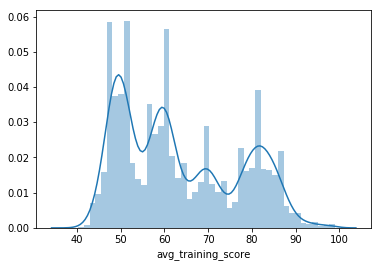

In [45]:
sns.distplot(train_df.avg_training_score)

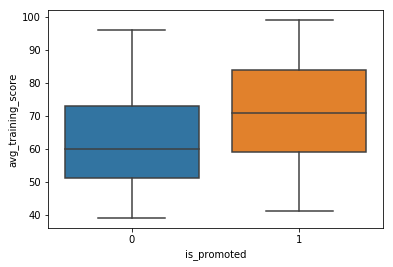

In [46]:
sns.boxplot(train_df.is_promoted,train_df.avg_training_score)

The average training score for the employees promoted is high compared to employees who are not promoted. This feature will also be used for modelling.

In [47]:
avg_training_score=pd.cut(train_df.avg_training_score,bins=[39,50,60,75,80,90,100],labels=['39-50','50-60','60-70','70-80','80-90','90-100'])
avg_training_score.to_frame()
train_df['avg_training_score_binned']=avg_training_score

In [48]:
train_df.avg_training_score_binned.value_counts()

50-60     16020
60-70     12955
39-50     12001
80-90      8739
70-80      4512
90-100      579
Name: avg_training_score_binned, dtype: int64

In [49]:
pd.crosstab(train_df.is_promoted,train_df.avg_training_score_binned)

avg_training_score_binned,39-50,50-60,60-70,70-80,80-90,90-100
is_promoted,,,,,,
0,11527,15141,11653,7638,4108,71
1,474,879,1302,1101,404,508


In [50]:
pd.crosstab(train_df.is_promoted,train_df.avg_training_score_binned,margins=True).apply(pctg)

avg_training_score_binned,39-50,50-60,60-70,70-80,80-90,90-100,All
is_promoted,,,,,,,
0,0.960503,0.945131,0.899498,0.874013,0.910461,0.122625,0.914827
1,0.039497,0.054869,0.100502,0.125987,0.089539,0.877375,0.085173
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
avg_training_score_test=pd.cut(test_df.avg_training_score,bins=[39,50,60,75,80,90,100],labels=['39-50','50-60','60-70','70-80','80-90','90-100'])
avg_training_score_test.to_frame()
test_df['avg_training_score_binned']=avg_training_score_test

In [52]:
test_df.avg_training_score_binned.value_counts()

50-60     6762
60-70     5511
39-50     5324
80-90     3700
70-80     1955
90-100     237
Name: avg_training_score_binned, dtype: int64

### Missing Values

In [53]:
train_df.education.fillna(train_df.education.mode()[0],inplace=True)
train_df.previous_year_rating.fillna(train_df.previous_year_rating.median(),inplace=True)

In [54]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,length_of_service_binned,avg_training_score_binned
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,5-10,39-50
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0-5,50-60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,5-10,39-50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,5-10,39-50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0-5,60-70


### Data Preparation

In [55]:
department_dummies=pd.get_dummies(train_df['department'],prefix='Department',drop_first=True)
education_dummies=pd.get_dummies(train_df['education'],prefix='Education',drop_first=True)
gender_dummies=pd.get_dummies(train_df['gender'],prefix='Gender',drop_first=True)
recruitment_channel_dummies=pd.get_dummies(train_df['recruitment_channel'],prefix='Recruitment Channel',drop_first=True)
no_of_trainings_dummies=pd.get_dummies(train_df['no_of_trainings'],prefix='Training',drop_first=True)
previous_year_rating_dummies=pd.get_dummies(train_df['previous_year_rating'],prefix='Previous Rating',drop_first=True)
length_of_service_binned_rating_dummies=pd.get_dummies(train_df['length_of_service_binned'],prefix='Service Binned',drop_first=True)
avg_training_score_binned_dummies=pd.get_dummies(train_df['avg_training_score_binned'],prefix='Training Score Binned',drop_first=True)

In [56]:
X=train_df.drop(['department','education','gender','age','employee_id','region','recruitment_channel','is_promoted','no_of_trainings','previous_year_rating','length_of_service','avg_training_score','length_of_service_binned','avg_training_score_binned'],axis=1)

In [57]:
X.head()

,KPIs_met >80%,awards_won?
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [58]:
X=pd.concat([X,department_dummies,education_dummies,recruitment_channel_dummies,no_of_trainings_dummies,previous_year_rating_dummies,length_of_service_binned_rating_dummies,avg_training_score_binned_dummies],axis=1)

In [59]:
y=train_df['is_promoted']

In [60]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')
X_sm,y_sm=smote.fit_sample(X,y)

In [61]:
X_sm.shape,y_sm.shape

((100280, 34), (100280,))

In [62]:
test_df.education.fillna(test_df.education.mode()[0],inplace=True)
test_df.previous_year_rating.fillna(test_df.previous_year_rating.median(),inplace=True)

In [63]:
department_dummies_test=pd.get_dummies(test_df['department'],prefix='Department',drop_first=True)
education_dummies_test=pd.get_dummies(test_df['education'],prefix='Education',drop_first=True)
gender_dummies_test=pd.get_dummies(test_df['gender'],prefix='Gender',drop_first=True)
recruitment_channel_dummies_test=pd.get_dummies(test_df['recruitment_channel'],prefix='Recruitment Channel',drop_first=True)
no_of_trainings_dummies_test=pd.get_dummies(test_df['no_of_trainings'],prefix='Training',drop_first=True)
previous_year_rating_dummies_test=pd.get_dummies(test_df['previous_year_rating'],prefix='Previous Rating',drop_first=True)
length_of_service_binned_rating_dummies_test=pd.get_dummies(test_df['length_of_service_binned'],prefix='Service Binned',drop_first=True)
avg_training_score_binned_dummies_test=pd.get_dummies(test_df['avg_training_score_binned'],prefix='Training Score Binned',drop_first=True)

In [64]:
X_test=test_df.drop(['department','education','gender','age','employee_id','region','recruitment_channel','no_of_trainings','previous_year_rating','length_of_service','avg_training_score','length_of_service_binned','avg_training_score_binned'],axis=1)

In [65]:
X_test=pd.concat([X_test,department_dummies_test,education_dummies_test,recruitment_channel_dummies_test,no_of_trainings_dummies_test,previous_year_rating_dummies_test,length_of_service_binned_rating_dummies_test,avg_training_score_binned_dummies_test],axis=1)

In [66]:
X_test.head()

,KPIs_met >80%,awards_won?,Department_Finance,Department_HR,Department_Legal,Department_Operations,Department_Procurement,Department_R&D,Department_Sales & Marketing,Department_Technology,...,Service Binned_5-10,Service Binned_10-15,Service Binned_15-20,Service Binned_20-30,Service Binned_30-40,Training Score Binned_50-60,Training Score Binned_60-70,Training Score Binned_70-80,Training Score Binned_80-90,Training Score Binned_90-100
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [67]:
X_train, X_split_test, y_train, y_split_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.33)

In [68]:
X_train.shape, X_split_test.shape, y_train.shape, y_split_test.shape

((67187, 34), (33093, 34), (67187,), (33093,))

In [69]:
pd.Series(y_sm).value_counts()

1    50140
0    50140
dtype: int64

In [70]:
#!pip install lightgbm

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

In [72]:
def RandomizedSearchCVmodel(model,score,iteration,param_dist,X,y):
    random_search =RandomizedSearchCV(model,param_distributions=param_dist,cv=5,scoring=score,n_iter=iteration)
    random_search.fit(X,y)
    print(random_search.grid_scores_)
    print(random_search.best_estimator_)
    

In [73]:
#1st Set
param_dist = {"penalty": ['l1', 'l2'],
              "C": [0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
logreg=LogisticRegression()

In [74]:
random_search=RandomizedSearchCV(logreg,param_distributions=param_dist,scoring='f1',cv=5)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'penalty': ['l1', 'l2'], 'C': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [75]:
random_search.best_params_

{'penalty': 'l2', 'C': 1.0}

In [76]:
random_search.best_score_

0.7709547826659124

In [77]:
logReg=LogisticRegression(C=0.5)
logReg.fit(X_train,y_train)
y_pred=logReg.predict(X_split_test)
confusion_matrix(y_split_test,y_pred)

array([[12414,  4216],
       [ 3461, 13002]], dtype=int64)

In [78]:
#1st Set
param_dist = {
 'max_depth': [20, 25, 30, None],
 'n_estimators': [45,50,55,60]}
rf=RandomForestClassifier()

In [79]:
random_search=RandomizedSearchCV(rf,param_distributions=param_dist,scoring='f1',cv=5)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [20, 25, 30, None], 'n_estimators': [45, 50, 55, 60]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [80]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 20}

In [81]:
random_search.best_score_

0.8356896590412748

In [82]:
randomForest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
randomForest.fit(X_train,y_train)
y_pred=randomForest.predict(X_split_test)
confusion_matrix(y_split_test,y_pred)

array([[12438,  4192],
       [ 1596, 14867]], dtype=int64)

In [83]:
rndForest1=RandomForestClassifier(n_estimators=50,min_samples_split=3,max_depth=20)
rndForest1.fit(X_train,y_train)
y_pred2=rndForest1.predict(X_split_test)
confusion_matrix(y_split_test,y_pred2)

array([[12389,  4241],
       [ 1566, 14897]], dtype=int64)

In [84]:
train_data = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.005
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['sub_feature'] = 0.5
params['num_leaves'] = 20
params['min_data'] = 40
params['max_depth'] = 10
params['n_estimators']=30
params['colsample_bytree']=0.66
params['subsample']=0.7
params['reg_alpha']=1.2
clf = lgb.train(params, train_data, 100)

In [85]:
lightgbm_pred=clf.predict(X_split_test)
lightgbm_pred

array([0.52913667, 0.49364488, 0.47358227, ..., 0.50832337, 0.51778084,
       0.51754167])

In [86]:
lightgbm_pred.shape

(33093,)

In [87]:
for i in range(0,33093):
    if lightgbm_pred[i]>=.5:       # setting threshold to .5
       lightgbm_pred[i]=1
    else:  
       lightgbm_pred[i]=0

In [88]:
confusion_matrix(y_split_test,lightgbm_pred)

array([[11419,  5211],
       [ 2701, 13762]], dtype=int64)

In [89]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred2=svc.predict(X_split_test)
confusion_matrix(y_split_test,y_pred2)

array([[11683,  4947],
       [ 2065, 14398]], dtype=int64)

In [90]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_split_test)
confusion_matrix(y_split_test,y_pred3)

array([[12531,  4099],
       [ 2789, 13674]], dtype=int64)

### Data Preparation 2

In [97]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,length_of_service_binned,avg_training_score_binned
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,5-10,39-50
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0-5,50-60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,5-10,39-50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,5-10,39-50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0-5,60-70


In [109]:
X2=train_df.drop(['employee_id','region','gender','recruitment_channel','length_of_service_binned','avg_training_score_binned','is_promoted','department','education','age'],axis=1)

In [110]:
X2=pd.concat([X2,department_dummies,education_dummies],axis=1)

In [111]:
X2.head()

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Department_Finance,Department_HR,Department_Legal,Department_Operations,Department_Procurement,Department_R&D,Department_Sales & Marketing,Department_Technology,Education_Below Secondary,Education_Master's & above
0,1,5.0,8,1,0,49,0,0,0,0,0,0,1,0,0,1
1,1,5.0,4,0,0,60,0,0,0,1,0,0,0,0,0,0
2,1,3.0,7,0,0,50,0,0,0,0,0,0,1,0,0,0
3,2,1.0,10,0,0,50,0,0,0,0,0,0,1,0,0,0
4,1,3.0,2,0,0,73,0,0,0,0,0,0,0,1,0,0


In [131]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,length_of_service_binned,avg_training_score_binned
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,0-5,70-80
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0-5,50-60
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0-5,39-50
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,5-10,60-70
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,5-10,60-70


In [132]:
X2_final_test=test_df.drop(['employee_id','region','gender','recruitment_channel','length_of_service_binned','avg_training_score_binned','department','education','age'],axis=1)

In [133]:
X2_final_test=pd.concat([X2_final_test,department_dummies_test,education_dummies_test],axis=1)

In [134]:
X2_final_test.head()

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Department_Finance,Department_HR,Department_Legal,Department_Operations,Department_Procurement,Department_R&D,Department_Sales & Marketing,Department_Technology,Education_Below Secondary,Education_Master's & above
0,1,3.0,1,1,0,77,0,0,0,0,0,0,0,1,0,0
1,1,3.0,5,0,0,51,0,1,0,0,0,0,0,0,0,0
2,1,1.0,4,0,0,47,0,0,0,0,0,0,1,0,0,0
3,3,2.0,9,0,0,65,0,0,0,0,1,0,0,0,0,0
4,1,4.0,7,0,0,61,1,0,0,0,0,0,0,0,0,0


In [118]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y,random_state=42,test_size=0.33)

In [120]:
param_dist = {
 'max_depth': [20, 25, 30, None],
 'n_estimators': [45,50,55,60],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10],
 'bootstrap': [True, False]}
rf2=RandomForestClassifier()

In [121]:
random_search=RandomizedSearchCV(rf2,param_distributions=param_dist,scoring='f1',cv=5)
random_search.fit(X2_train,y2_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [20, 25, 30, None], 'n_estimators': [45, 50, 55, 60], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [122]:
random_search.best_params_

{'n_estimators': 55,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': True}

In [123]:
random_search.best_score_

0.4929935731764101

In [124]:
rndForest2=RandomForestClassifier(n_estimators=55,min_samples_split=10,max_depth=25,max_features='sqrt')
rndForest2.fit(X2_train,y2_train)
y_pred2=rndForest2.predict(X2_test)
confusion_matrix(y2_test,y_pred2)

array([[16550,    63],
       [  949,   525]], dtype=int64)

In [140]:
param_dist = {
 'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]}
svc_hypertunning=SVC()
random_search_svc=RandomizedSearchCV(svc_hypertunning,param_distributions=param_dist,scoring='f1',cv=5)
random_search_svc.fit(X2_train,y2_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [144]:
random_search_svc.best_params_

{'gamma': 0.1, 'C': 1}

In [145]:
random_search_svc.best_score_

0.45608494081260714

In [146]:
svc_tuned=SVC(gamma=0.1)
svc_tuned.fit(X2_train,y2_train)
y_pred3=svc_tuned.predict(X2_test)
confusion_matrix(y2_test,y_pred3)

array([[16591,    22],
       [ 1005,   469]], dtype=int64)

In [147]:
y_pred_final=svc.predict(X2_final_test)
y_pred_final.shape

(23490,)

In [148]:
test_df.employee_id.shape

(23490,)

In [149]:
my_submission = pd.DataFrame({'employee_id': test_df.employee_id, 'is_promoted': y_pred_final})
my_submission.to_csv('submission_svc_tunned.csv', index=False)